Alejandro Restrepo Giraldo CC: 1001389709

## Tarea 6: Monte Carlo

Se implementa el algoritmo importance sampling en donde las integrales se aproximan por 

$$Q_N = \frac{1}{N}\sum_{i=1}^N\frac{f(x_n)}{p(x_n)}$$

Con error

$$\frac{\sigma(f/p)}{\sqrt{N}} = \frac{\frac{1}{N}\sum_{i=1}^N\left( \frac{f(x_n)}{p(x_n)} \right)^2-Q_N ^2}{\sqrt{N}}$$

en donde $p(x)$ debe tener las propiedades de una distribución densidad de probabilidad.

In [34]:
import numpy as np
import random
import matplotlib.pyplot as plt

La primera integral a desarrollar es $$\int_{0}^{10} dx (x^2-4)$$

La normal $N(12,3.7)$ se aproxima mucho a la función a integrar como lo evidencia la siguiente gráfica en donde se muestran $1000\times N(12,3.7)$ y $x^2-4$.

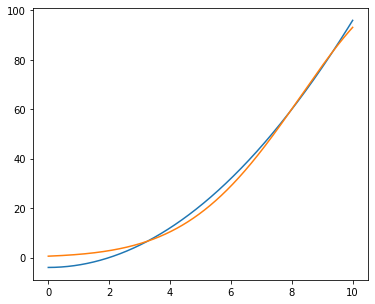

In [35]:
# Número de puntos
N = 1000000
# Sample points
x = np.linspace(0,10, N)

# Funciones a integrar y de peso
f = x**2-4
p = (1/(3.7*(2*np.pi)**0.5))*np.e**(-(x-12)**2/(2*3.7**2))

# Gráfica
fig = plt.figure(figsize=(6,5))
plt.plot(x,f)
plt.plot(x,1000*p)
plt.show()

In [36]:
# Integral
QN = 0
for i in range(0,len(f)):
    QN += f[i]/p[i]
QN = QN/N
print(QN)

250.41267144826162


$$\frac{\sigma(f/p)}{\sqrt{N}} = \frac{\frac{1}{N}\sum_{i=1}^N\left( \frac{f(x_n)}{p(x_n)} \right)^2-Q_N ^2}{\sqrt{N}}$$

In [37]:
# Error
e = 0
for i in range(0,len(f)):
    e += (f[i]/p[i])**2 - QN**2
e = e/N
err = e/N**0.5

print(err)

3112.0380020693765


La segunda integral a desarrollar es $$\int_{0.5}^{1.7} dx sin(x)^2$$

La normal $N(1.5,0.6)$ se aproxima mucho a la función a integrar como lo evidencia la siguiente gráfica en donde se muestran $1.5\times N(1.5,0.6)$ y $sin(x)^2$.

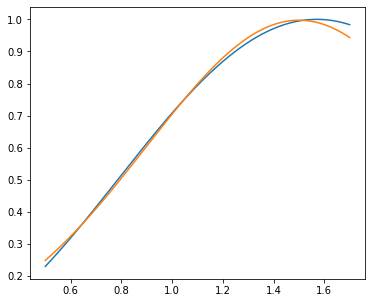

In [38]:
# Número de puntos
N = 1000000
# Sample points
x = np.linspace(0.5,1.7, N)

# Funciones a integrar y de peso
f = np.sin(x)**2
p = (1/(0.6*(2*np.pi)**0.5))*np.e**(-(x-1.5)**2/(2*0.6**2))

# Gráfica
fig = plt.figure(figsize=(6,5))
plt.plot(x,f)
plt.plot(x,1.5*p)
plt.show()

In [39]:
# Integral
QN = 0
for i in range(0,len(f)):
    QN += f[i]/p[i]
QN = QN/N
print(QN)

1.4985837412499357


In [40]:
# Error
e = 0
for i in range(0,len(f)):
    e += (f[i]/p[i])**2 - QN**2
e = e/N
err = e/N**0.5

print(err)

8.227324446789981e-07


Se observa que el método se desvía de los valores reales (299.333 y 0.874253) en 16% y 71% respectivamente para las integrales primera y segunda. El método es muy suceptible a la distribución.